In [2]:
import random
import matplotlib.pyplot as plt

The Environment Class along with the initial environment plotted:

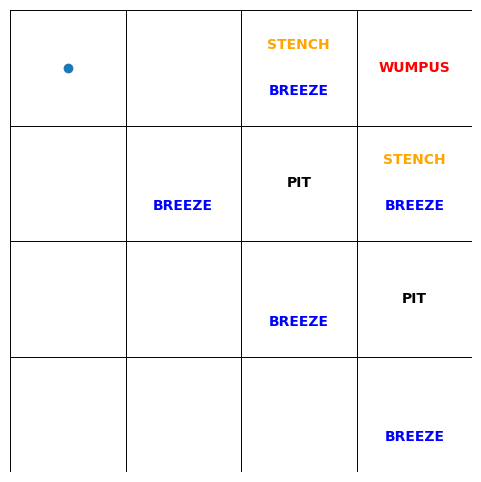

In [4]:
class Environment:
    def __init__(self, size=4, pos=(0,0)):
        self.size = size
        self.rows = size
        self.cols = size
        self.initial_pos = pos

        self.pits = [(2,3),(1,2)]
        self.monsters = [(0,3)]

        self.breeze = set()
        self.stench = set()

        self.compute_percepts()

    def neighbors(self,x,y):
        for dx,dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            nx,ny = x+dx, y+dy
            if 0 <= nx < self.size and 0 <= ny < self.size:
                yield nx,ny

    def compute_percepts(self):
        for x,y in self.pits:
            self.breeze.update(self.neighbors(x,y))
        for x,y in self.monsters:
            self.stench.update(self.neighbors(x,y))

    def get_percepts(self,pos):
        percepts = []
        if pos in self.breeze:
            percepts.append("BREEZE")
        if pos in self.stench:
            percepts.append("STENCH")
        return percepts

    def is_terminal(self,pos):
        return pos in self.pits or pos in self.monsters

    def step(self,pos,new_pos):
        return new_pos

    def plot(self, agent_pos=None):
        cell_size=1.5
        lineWidth=0.7

        fig, ax=plt.subplots(figsize=(self.cols*cell_size, self.rows*cell_size))

        for x in range(self.cols+1):
            ax.plot([x,x],[0,self.rows],linewidth=lineWidth,color="black")
        for y in range(self.rows+1):
            ax.plot([0,self.cols],[y,y],linewidth=lineWidth,color="black")

        def draw_text(r,c,text,color,dy=0):
            ax.text(c+0.5,self.rows-r-0.5+dy,text,
                    ha="center",va="center",color=color,fontsize=10,weight="bold")

        for r,c in self.pits:
            draw_text(r,c,"PIT","black")

        for r,c in self.monsters:
            draw_text(r,c,"WUMPUS","red")

        for r,c in self.breeze:
            draw_text(r,c,"BREEZE","blue",-0.2)

        for r,c in self.stench:
            draw_text(r,c,"STENCH","orange",0.2)

        if agent_pos:
            ax.scatter(agent_pos[1]+0.5,self.rows-agent_pos[0]-0.5,s=100)

        ax.set_aspect("equal")
        ax.axis("off")
        plt.show()

        
env=environment(4)
env.plot()

The agent class containing its perceiving, thinking, action step loop:

In [15]:
class Intelligent_Agent:
    def __init__(self, start=(0, 0)):
        self.pos=start
        self.safe={start}
        self.visited=set()

        self.possible_wumpus=set()
        self.possible_pit=set()

        self.percepts={}
        self.path=[start]

    def perceive(self, percepts):
        self.percepts[self.pos]=percepts

    def think(self, env):
        x,y = self.pos
        neighbors = list(env.neighbors(x,y))
        percepts = self.percepts[self.pos]

        if "BREEZE" not in percepts:
            for n in neighbors:
                if n not in self.possible_pit:
                    self.safe.add(n)
        
        if "STENCH" not in percepts:
            for n in neighbors:
                if n not in self.possible_wumpus:
                    self.safe.add(n)


        if "BREEZE" in percepts:
            for n in neighbors:
                if n not in self.safe:
                    self.possible_pit.add(n)

        if "STENCH" in percepts:
            for n in neighbors:
                if n not in self.safe:
                    self.possible_wumpus.add(n)

        self.possible_pit -= self.safe
        self.possible_wumpus -= self.safe

    def act(self, env):
        x,y = self.pos
        for n in env.neighbors(x,y):
            if n in self.safe and n not in self.visited and n not in self.possible_pit and n not in self.possible_wumpus:
                return n

        if len(self.path) > 1:
            self.path.pop()
            return self.path[-1]

        return None

    def step(self, env):
        self.visited.add(self.pos)

        percepts = env.get_percepts(self.pos)
        self.perceive(percepts)

        self.think(env)

        next_pos = self.act(env)

        if next_pos:
            self.pos = next_pos
            self.path.append(next_pos)
            return True

        return False



The simulation of agents path with a defined environment:

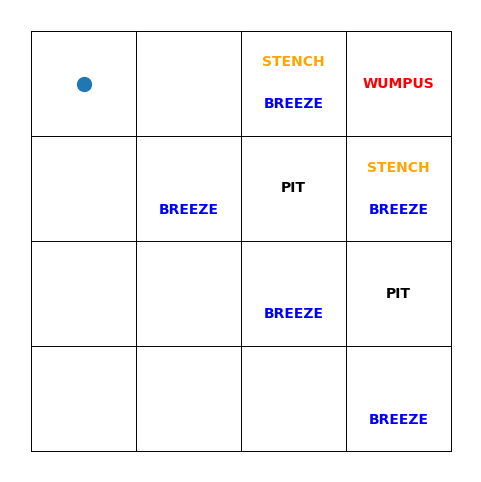

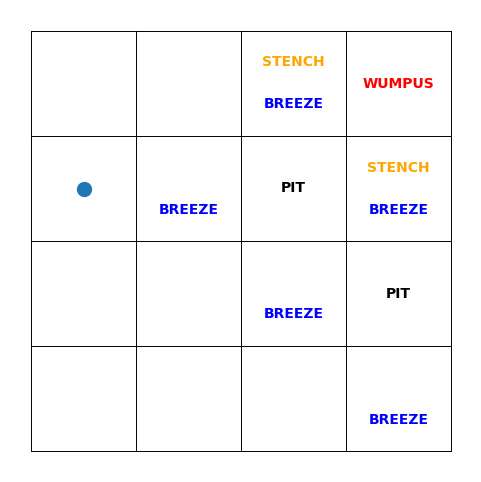

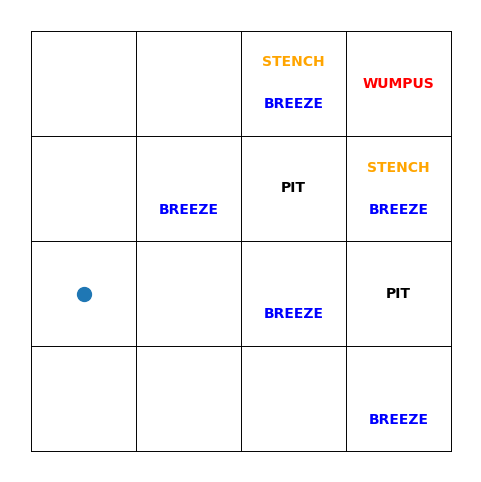

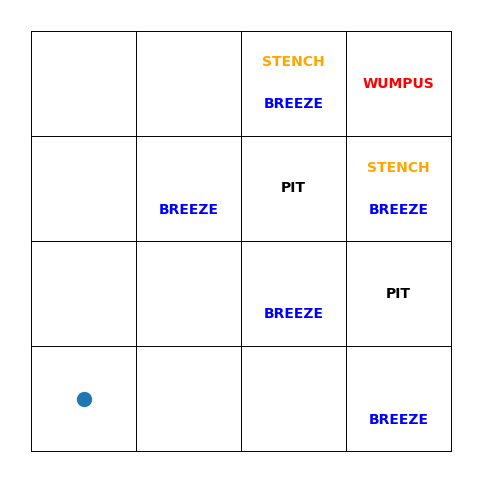

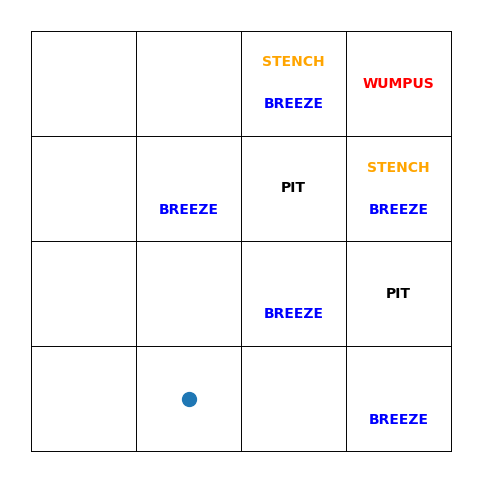

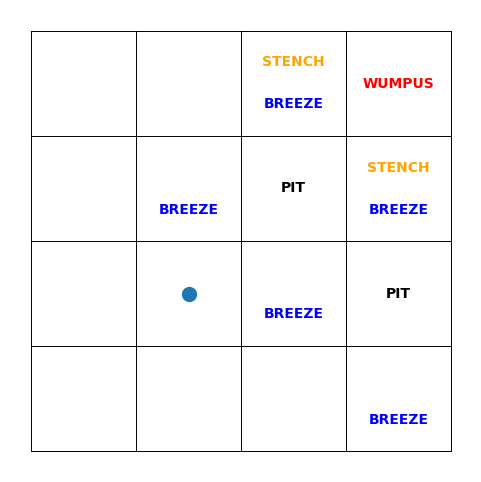

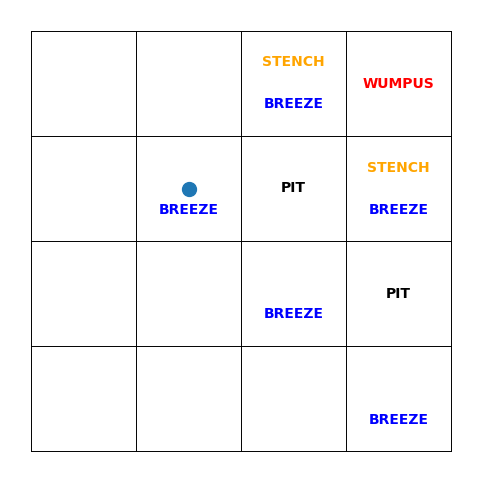

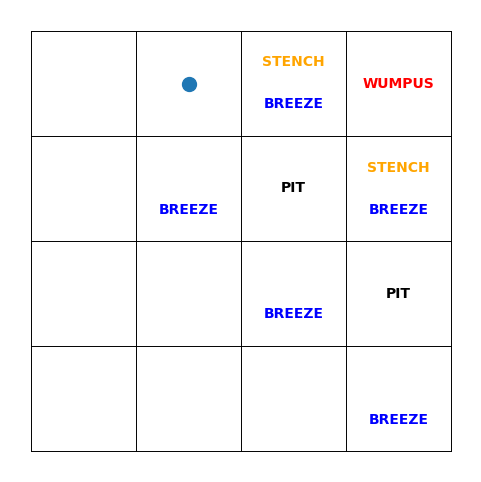

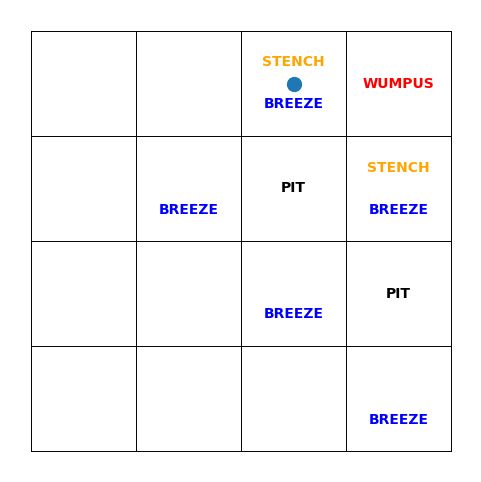

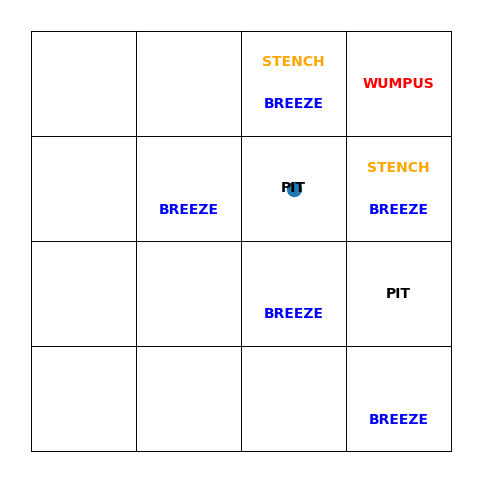

💀 Agent died at (1, 2)


In [16]:
env = Environment(4)
agent = Intelligent_Agent(env.initial_pos)

while True:
    env.plot(agent.pos)

    if env.is_terminal(agent.pos):
        print("💀 Agent died at", agent.pos)
        break

    moved = agent.step(env)

    if not moved:
        print("🏁 Agent stopped at", agent.pos)
        break
